In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
print (cities)

['bonavista', 'lerwick', 'hermanus', 'guadalupe victoria', 'tinskoy', 'tigil', 'khatanga', 'cidreira', 'poum', 'volovo', 'kodiak', 'dicabisagan', 'verkhnyaya inta', 'gondomar', 'san jeronimo', 'oil city', 'bredasdorp', 'vaini', 'aklavik', 'cape town', 'fare', 'guekedou', 'thompson', 'port alfred', 'amaigbo', 'fuyu', 'provideniya', 'busselton', 'jamestown', 'airai', 'wanning', 'tasiilaq', 'samusu', 'kapaa', 'tiksi', 'revda', 'krasnoselkup', 'mengen', 'nouakchott', 'gryfice', 'marawi', 'neustadt', 'ewo', 'upernavik', 'taolanaro', 'geraldton', 'ostrovnoy', 'belushya guba', 'tres arroyos', 'kununurra', 'bengkulu', 'te anau', 'rawson', 'barrow', 'tocopilla', 'savannah bight', 'karratha', 'qaanaaq', 'ucluelet', 'new norfolk', 'moron', 'ahipara', 'yurimaguas', 'mataura', 'rikitea', 'sataua', 'souillac', 'dikson', 'arraial do cabo', 'praia', 'cloquet', 'port hardy', 'butaritari', 'port-gentil', 'sao desiderio', 'vestmannaeyjar', 'nsanje', 'albany', 'shache', 'cabo san lucas', 'umzimvubu', 'her

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bonavista
Processing Record 2 of Set 1 | lerwick
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | guadalupe victoria
Processing Record 5 of Set 1 | tinskoy
Processing Record 6 of Set 1 | tigil
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | volovo
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | dicabisagan
Processing Record 13 of Set 1 | verkhnyaya inta
Processing Record 14 of Set 1 | gondomar
Processing Record 15 of Set 1 | san jeronimo
Processing Record 16 of Set 1 | oil city
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | aklavik
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | fare
Processing Record 22 of Set 1 | guekedou
City not found. Skipping...
Processing Record 23 of Set 1 | thompson
Processing Record 24 of Set 1 |

Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | tilichiki
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | vysokogornyy
Processing Record 46 of Set 4 | magadan
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | bairiki
Processing Record 49 of Set 4 | san quintin
Processing Record 50 of Set 4 | hilo
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | makakilo city
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | carolina
Processing Record 5 of Set 5 | umm lajj
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | liwale
Processing Record 8 of Set 5 | mahibadhoo
Processing Record 9 of Set 5 | ust-omchug
Processing Record 10 of Set 5 | soure
Processing Record 11 of Set 5 | belaya gora
Processing Record 12 of Set 5 | agirish
Processing Record 13 of S

Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | riyadh
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | bac lieu
Processing Record 33 of Set 8 | rocha
Processing Record 34 of Set 8 | saint george
Processing Record 35 of Set 8 | chilca
Processing Record 36 of Set 8 | kiama
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | kama
Processing Record 39 of Set 8 | omboue
Processing Record 40 of Set 8 | itoman
Processing Record 41 of Set 8 | khlung
Processing Record 42 of Set 8 | jalu
Processing Record 43 of Set 8 | hopelchen
Processing Record 44 of Set 8 | tahe
Processing Record 45 of Set 8 | fortuna
Processing Record 46 of Set 8 | chernyshevskiy
Processing Record 47 of Set 8 | tabulbah
City not found. Skipping...
Processing Record 48 of Set 8 | salalah
Processing Record 49 of Set 8 | lincoln
Processing Record 50 of Set 8 | formosa
Processing Record 1 of Set 9 | avila
Processing Record 2 of Set 9 | ketchikan
Processing Record

Processing Record 15 of Set 12 | puerto cabezas
Processing Record 16 of Set 12 | rehoboth
Processing Record 17 of Set 12 | goundam
Processing Record 18 of Set 12 | ambon
Processing Record 19 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 12 | dwarka
Processing Record 21 of Set 12 | canico
Processing Record 22 of Set 12 | meadow lake
Processing Record 23 of Set 12 | heihe
Processing Record 24 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 25 of Set 12 | yorosso
Processing Record 26 of Set 12 | devils lake
Processing Record 27 of Set 12 | catalina
Processing Record 28 of Set 12 | kailua
Processing Record 29 of Set 12 | akonolinga
Processing Record 30 of Set 12 | marystown
Processing Record 31 of Set 12 | general roca
Processing Record 32 of Set 12 | tanjong tokong
City not found. Skipping...
Processing Record 33 of Set 12 | aksarayskiy
Processing Record 34 of Set 12 | chibuto
Processing Record 35 of Set 12 | badiraguato
Processing Record 

In [10]:

len(city_data)

562

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonavista,48.65,-53.11,51.80,87,56,12.75,CA,2020-12-27 06:48:44
1,Lerwick,60.15,-1.15,41.00,80,100,14.99,GB,2020-12-27 06:48:44
2,Hermanus,-34.42,19.23,66.00,73,97,4.00,ZA,2020-12-27 06:48:44
3,Guadalupe Victoria,32.29,-115.11,53.60,37,1,2.66,MX,2020-12-27 06:48:44
4,Tinskoy,56.15,96.92,-26.21,82,61,3.29,RU,2020-12-27 06:48:44
5,Tigil,57.80,158.67,-8.99,88,71,1.12,RU,2020-12-27 06:48:45
6,Khatanga,71.97,102.50,-21.33,87,100,10.22,RU,2020-12-27 06:48:45
7,Cidreira,-30.18,-50.21,72.16,86,99,12.50,BR,2020-12-27 06:48:45
8,Poum,-20.23,164.02,79.59,76,100,10.63,NC,2020-12-27 06:48:45
9,Volovo,48.52,23.51,28.99,81,93,1.99,UA,2020-12-27 06:48:46


In [12]:
#Re-order columns --City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonavista,CA,2020-12-27 06:48:44,48.65,-53.11,51.80,87,56,12.75
1,Lerwick,GB,2020-12-27 06:48:44,60.15,-1.15,41.00,80,100,14.99
2,Hermanus,ZA,2020-12-27 06:48:44,-34.42,19.23,66.00,73,97,4.00
3,Guadalupe Victoria,MX,2020-12-27 06:48:44,32.29,-115.11,53.60,37,1,2.66
4,Tinskoy,RU,2020-12-27 06:48:44,56.15,96.92,-26.21,82,61,3.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

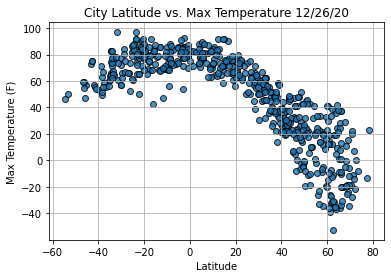

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

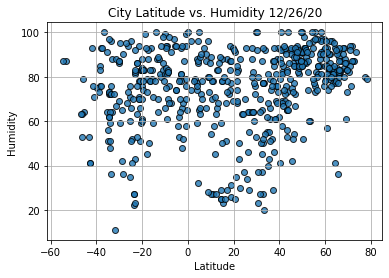

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

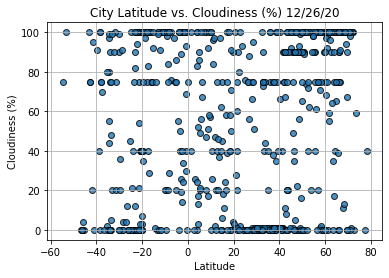

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

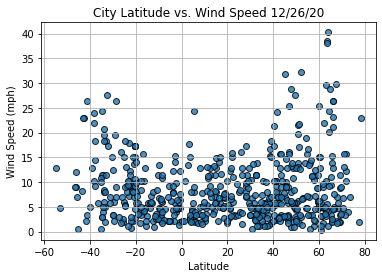

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
()    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


In [21]:
index13 = city_data_df.loc[13] 
index13

City                     Gondomar
Country                        PT
Date          2020-12-27 06:48:47
Lat                         41.14
Lng                         -8.53
Max Temp                     35.6
Humidity                       69
Cloudiness                      0
Wind Speed                  10.29
Name: 13, dtype: object

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


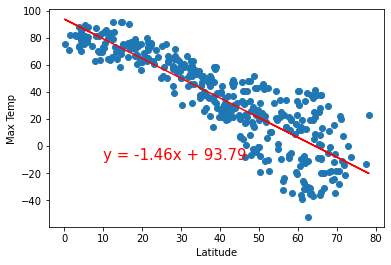

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-10))

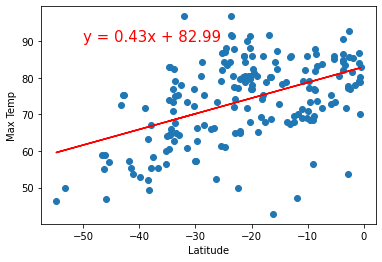

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

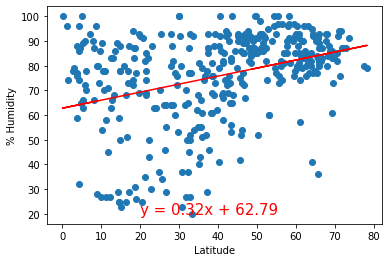

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(20,20))


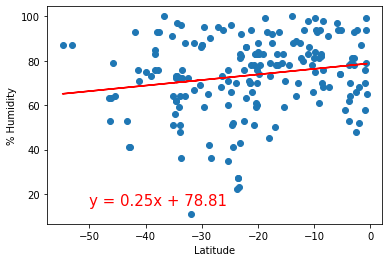

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

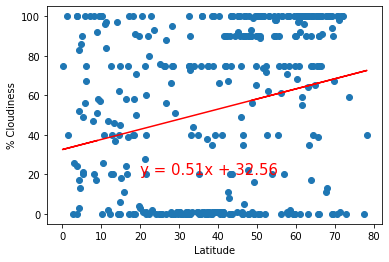

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,20))

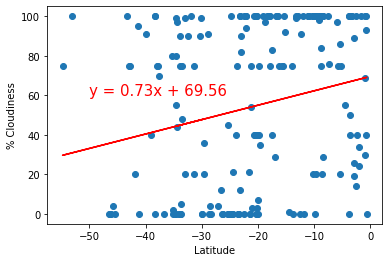

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

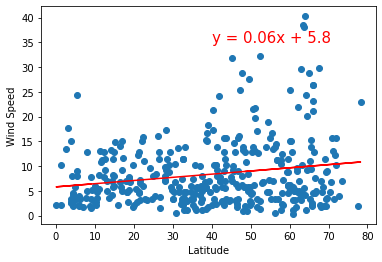

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

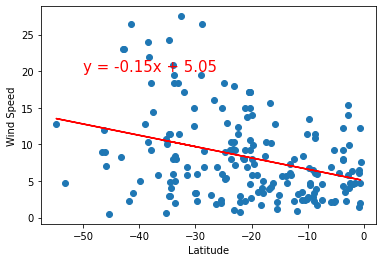

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,20
                                    ))